# import all libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Machine Learning Libraries
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest,chi2,f_classif
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

import pickle
import string

# Text Processing libraries
import nltk
from nltk.stem import PorterStemmer

# 1.data cleaning
# 2.EDA
# 3.Text preprocessing
# 4.Model Building
# 5.Evaluation
# 6.Improvement
# 7.Prompt



# Analysis about data with some most common commands


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Suicide_Detection.csv')
data.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [ ]:
data.shape

(232074, 3)

In [ ]:
df = data.sample(n=10000, random_state=42)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 74414 to 224640
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10000 non-null  int64 
 1   text        10000 non-null  object
 2   class       10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 312.5+ KB


In [ ]:
df.columns

Index(['Unnamed: 0', 'text', 'class'], dtype='object')

In [ ]:
df['Unnamed: 0'].is_unique

True

In [ ]:
df.drop(columns = 'Unnamed: 0',inplace=True)

In [ ]:
df.head()

,text,class
74414,I Don't know?7? Months self harm free and the ...,suicide
149516,I HAVE TO START BECOMING RICH I HAVE TO START ...,non-suicide
12484,"A poem (haiku) for u/Me-Game-Dev hi, hello hel...",non-suicide
14043,I've honestly got no idea what to do anymore.I...,suicide
30673,Do you ever just cry? Like you just think abou...,non-suicide


In [ ]:
df.isnull().sum()

,0
text,0
class,0


In [ ]:
df.duplicated().sum()

0

class
non-suicide    5048
suicide        4952
Name: count, dtype: int64


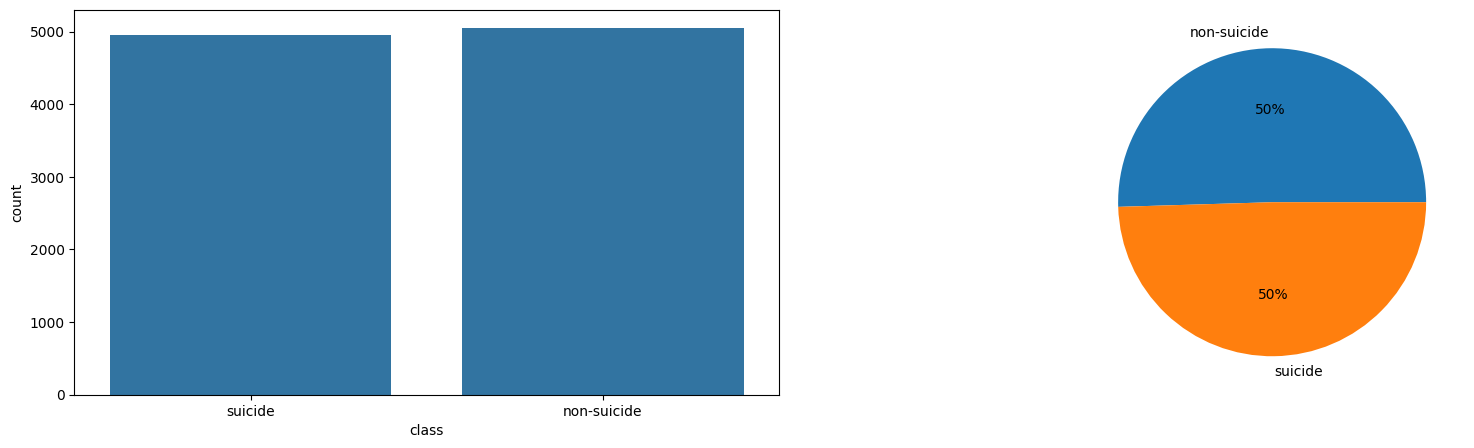

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

classCnt = df['class'].value_counts()
print(classCnt)

plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='class')

plt.subplot(1, 2, 2)
plt.pie(classCnt, labels=classCnt.index, autopct='%.0f%%')

plt.show()



# Data Preprocessing
1.Lower case
2.Tokenization
3.Removing special charcater
4.Removing stop words and punctuation
5.stemming

# Before Preprocessing

In [ ]:
df.head()

,text,class
74414,I Don't know?7? Months self harm free and the ...,suicide
149516,I HAVE TO START BECOMING RICH I HAVE TO START ...,non-suicide
12484,"A poem (haiku) for u/Me-Game-Dev hi, hello hel...",non-suicide
14043,I've honestly got no idea what to do anymore.I...,suicide
30673,Do you ever just cry? Like you just think abou...,non-suicide


In [ ]:
df['text']= df['text'].str.lower()

In [ ]:
df['text'] = df['text'].str.replace(r'[^\w\s]+', '',regex = True)

In [ ]:
import nltk
from nltk.corpus import stopwords

# Download the 'stopwords' dataset
nltk.download('stopwords')

# Now you can load the stop words
stop_words = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import nltk

nltk.download('punkt')

#tokenization
df['text'] = df['text'].apply(lambda x:nltk.word_tokenize(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#stemming
ps = PorterStemmer()
df['text'] = df['text'].apply(lambda x : [ps.stem(i) for i in x])

In [ ]:
df['text']=df['text'].apply(lambda x : ' '.join(x))

# After Preprocessing

In [ ]:
df.head()

,text,class
74414,dont know7 month self harm free urg get strong...,suicide
149516,start becom rich start compani becom 16 afford...,non-suicide
12484,poem haiku umegamedev hi hello hello stop fuck...,non-suicide
14043,ive honestli got idea anymoreit feel everyon f...,suicide
30673,ever cri like think unfair life cri cant cri e...,non-suicide


# wordcloud

In [ ]:
#spam messages word cloud
from wordcloud import WordCloud
wc=WordCloud(width=500,min_font_size=10,background_color='white')

In [ ]:
sucide_wc=wc.generate(df[df['class']=='suicide']['text'].str.cat(sep=" "))

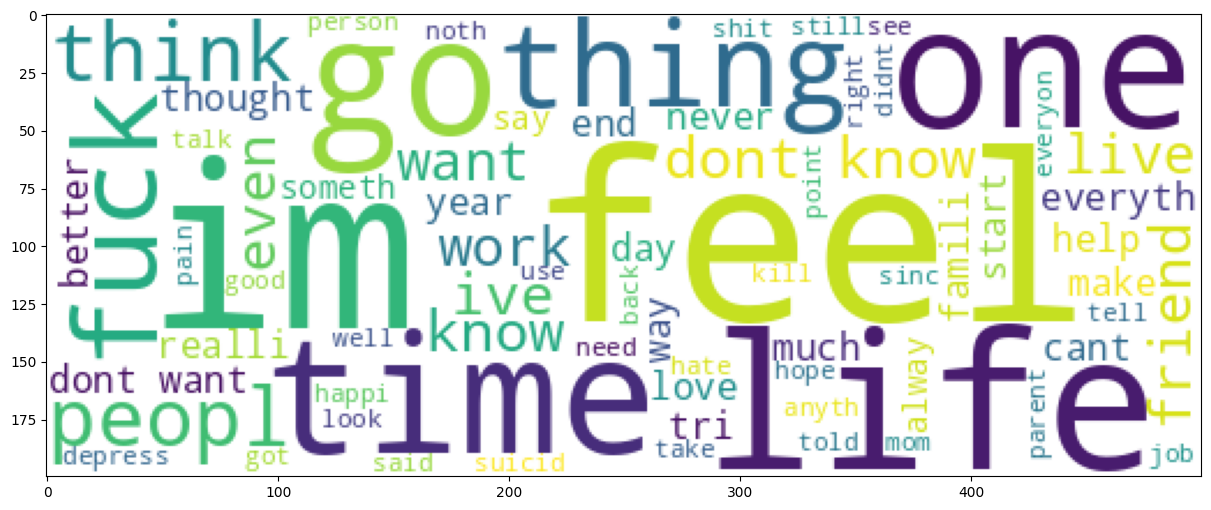

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(sucide_wc)

In [ ]:
non_suicide_wc=wc.generate(df[df['class']=='non-suicide']['text'].str.cat(sep=" "))

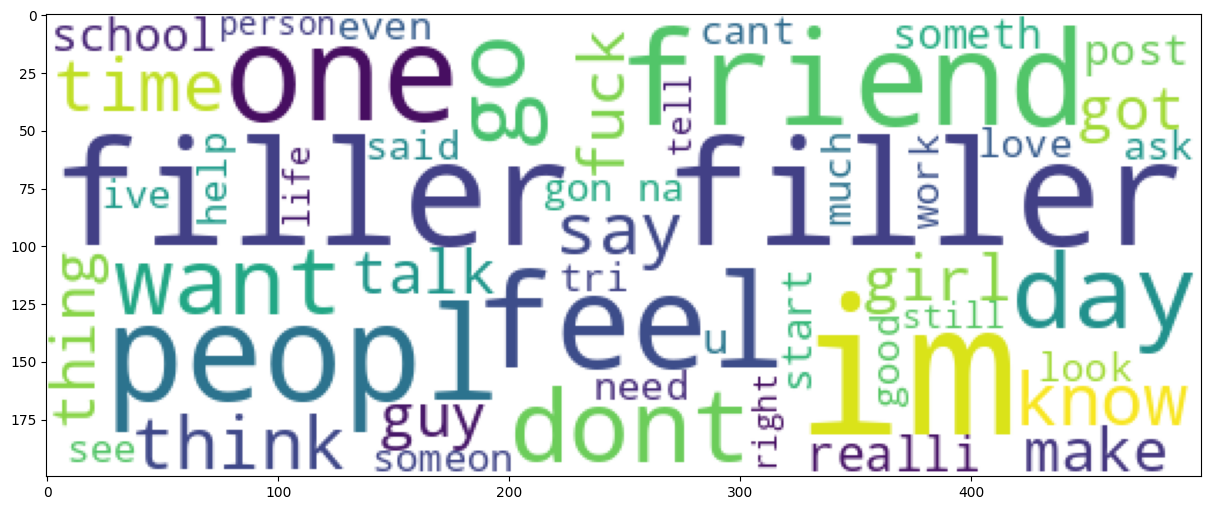

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(non_suicide_wc)

In [ ]:
spam_corpus=[]
for msg in df[df['class']=='suicide']['text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)

491062

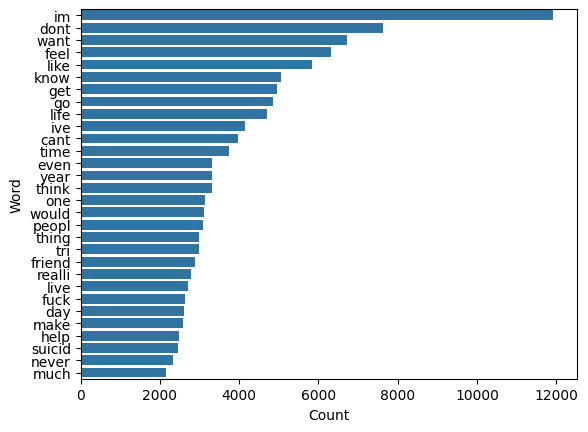

In [ ]:
import seaborn as sns
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt



# Count the occurrences of items in spam_corpus
word_counts = Counter(spam_corpus)

# Get the 30 most common items and their counts
most_common_words = word_counts.most_common(30)

# Create a DataFrame for the data
data = pd.DataFrame(most_common_words, columns=['Word', 'Count'])

# Create the bar plot
sns.barplot(x='Count', y='Word', data=data)

# Show the plot
plt.show()


In [ ]:
data

,Word,Count
0,im,11921
1,dont,7625
2,want,6730
3,feel,6328
4,like,5850
5,know,5051
6,get,4951
7,go,4845
8,life,4711
9,ive,4141


In [ ]:
nonsuicide_corpus=[]
for msg in df[df['class']=='non-suicide']['text'].tolist():
    for word in msg.split():
        nonsuicide_corpus.append(word)

In [ ]:
len(nonsuicide_corpus)

157889

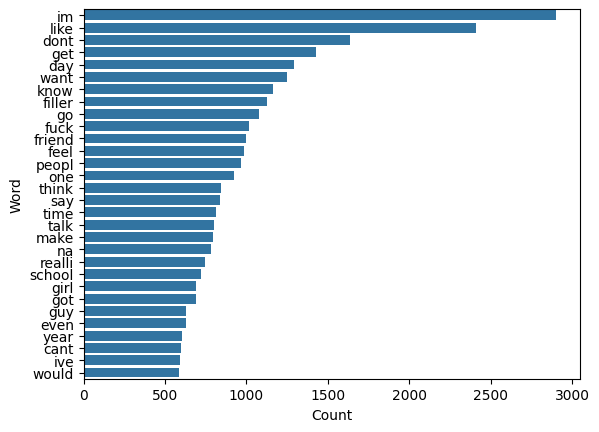

In [ ]:
import seaborn as sns
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'spam_corpus' is your list of text data

# Count the occurrences of items in spam_corpus
word_counts = Counter(nonsuicide_corpus)

# Get the 30 most common items and their counts
most_common_words = word_counts.most_common(30)

# Create a DataFrame for the data
data = pd.DataFrame(most_common_words, columns=['Word', 'Count'])

# Create the bar plot
sns.barplot(x='Count', y='Word', data=data)

# Show the plot
plt.show()


In [ ]:
data

,Word,Count
0,im,2902
1,like,2408
2,dont,1635
3,get,1427
4,day,1292
5,want,1248
6,know,1164
7,filler,1125
8,go,1079
9,fuck,1018


In [ ]:
df.to_csv('file1.csv')

In [ ]:
dfnew = pd.read_csv('file1.csv')
dfnew.head()

,Unnamed: 0,text,class
0,74414,dont know7 month self harm free urg get strong...,suicide
1,149516,start becom rich start compani becom 16 afford...,non-suicide
2,12484,poem haiku umegamedev hi hello hello stop fuck...,non-suicide
3,14043,ive honestli got idea anymoreit feel everyon f...,suicide
4,30673,ever cri like think unfair life cri cant cri e...,non-suicide


In [ ]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10000 non-null  int64 
 1   text        9999 non-null   object
 2   class       10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


In [ ]:
ind = dfnew[dfnew['text'].isnull()].index

In [ ]:
df.iloc[ind]

,text,class
102482,,suicide


In [ ]:
# ind = dfnew[dfnew['text'].isnull()].index

In [ ]:
dfnew.dropna(inplace=True)

# Machine Learning - Model Selection

In [ ]:
x,y = dfnew['text'],dfnew['class']

# TF-IDF vectorizer

In [ ]:
vectorizer = TfidfVectorizer(min_df=50,max_features=5000)
x =  vectorizer.fit_transform(x).toarray()

In [ ]:
with open('tfidf.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=5)

In [ ]:
X_train.shape,X_test.shape

((6999, 1320), (3000, 1320))

# Naive Bayes (Voting Classifier)

In [ ]:
nb = GaussianNB()
nb2 = BernoulliNB()
nb3 = MultinomialNB()
VotingClassifiers = VotingClassifier(estimators=[('GaussianNB', nb),('BernoulliNB',nb2), ('MultinomialNB', nb3)], voting = 'soft')
VotingClassifiers.fit(X_train, y_train)
print('Training score:',VotingClassifiers.score(X_train, y_train))
print('Testing score:',VotingClassifiers.score(X_test,y_test))

Training score: 0.899271324474925
Testing score: 0.8753333333333333


              precision    recall  f1-score   support

 non-suicide       0.88      0.88      0.88      1542
     suicide       0.87      0.87      0.87      1458

    accuracy                           0.88      3000
   macro avg       0.88      0.88      0.88      3000
weighted avg       0.88      0.88      0.88      3000



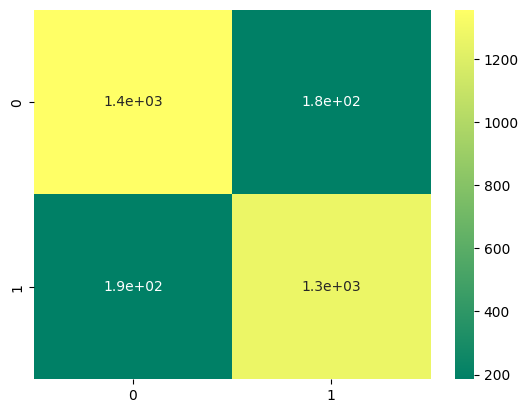

In [ ]:
y_act=y_test
y_pred=VotingClassifiers.predict(X_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='summer')
print(classification_report(y_act,y_pred))

# Random Forest

In [ ]:
classifiers = RandomizedSearchCV(RandomForestClassifier(),{'n_estimators':[4,5],'criterion':['entropy'],
                                                      'max_depth':range(1,4),'min_samples_split':range(2,5)},random_state=12)
classifiers.fit(X_train, y_train)
print('Training score:',classifiers.score(X_train, y_train))
print('Testing score:',classifiers.score(X_test,y_test))
print(classifiers.best_estimator_)

Training score: 0.7546792398914131
Testing score: 0.7506666666666667
RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_split=3,
                       n_estimators=5)


              precision    recall  f1-score   support

 non-suicide       0.72      0.86      0.78      1542
     suicide       0.81      0.64      0.71      1458

    accuracy                           0.75      3000
   macro avg       0.76      0.75      0.75      3000
weighted avg       0.76      0.75      0.75      3000



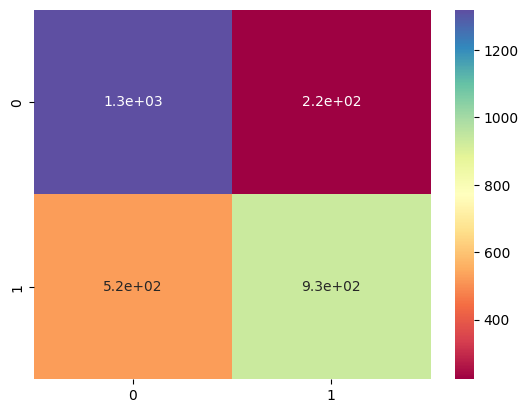

In [ ]:
y_act=y_test
y_pred=classifiers.predict(X_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='Spectral')
print(classification_report(y_act,y_pred))

# Decision Tree

In [ ]:
model2 = DecisionTreeClassifier(criterion='gini',splitter='random',min_samples_leaf=70,max_depth=4,random_state=0)
model2.fit(X_train, y_train)
print(model2.score(X_train, y_train))
print(model2.score(X_test,y_test))

0.7485355050721532
0.7526666666666667


              precision    recall  f1-score   support

 non-suicide       0.74      0.80      0.77      1542
     suicide       0.77      0.70      0.73      1458

    accuracy                           0.75      3000
   macro avg       0.75      0.75      0.75      3000
weighted avg       0.75      0.75      0.75      3000



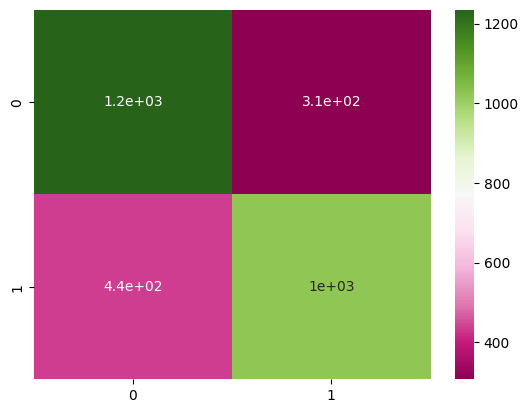

In [ ]:
y_act=y_test
y_pred=model2.predict(X_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='PiYG')
print(classification_report(y_act,y_pred))

# Gradient Boosting

In [ ]:
model3 = RandomizedSearchCV(GradientBoostingClassifier(),{"learning_rate": range(3,5),
                "max_depth":[200],"max_features":range(6,10,2),
                 "n_estimators":[10]},random_state=8,n_jobs=-1)
model3.fit(X_train,y_train)
print('Training score:',model3.score(X_train,y_train))
print('Testing score:',model3.score(X_test,y_test))
model3.best_params_

Training score: 0.6328046863837691
Testing score: 0.6033333333333334


{'n_estimators': 10, 'max_features': 6, 'max_depth': 200, 'learning_rate': 4}

              precision    recall  f1-score   support

 non-suicide       0.62      0.57      0.60      1542
     suicide       0.58      0.63      0.61      1458

    accuracy                           0.60      3000
   macro avg       0.60      0.60      0.60      3000
weighted avg       0.60      0.60      0.60      3000



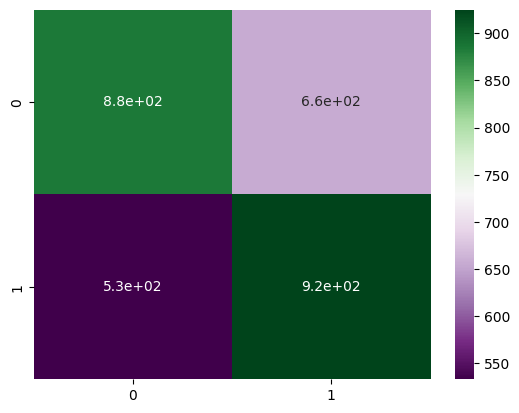

In [ ]:
#confusion matrix and classification report
y_act=y_test
y_pred=model3.predict(X_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='PRGn')
print(classification_report(y_act,y_pred))

# XG Boost

In [ ]:
modelxgb = XGBClassifier( eval_metric='map',max_depth=200,n_estimators=70,learning_rate=1.99)
modelxgb.fit(X_train,y_train.replace({"non-suicide":0,'suicide':1}))
print('Training score:',modelxgb.score(X_train,y_train.replace({"non-suicide":0,'suicide':1})))
print('Testing score:',modelxgb.score(X_test,y_test.replace({"non-suicide":0,'suicide':1})))

Training score: 0.8555507929704244
Testing score: 0.7883333333333333


              precision    recall  f1-score   support

           0       0.77      0.83      0.80      1542
           1       0.81      0.74      0.77      1458

    accuracy                           0.79      3000
   macro avg       0.79      0.79      0.79      3000
weighted avg       0.79      0.79      0.79      3000



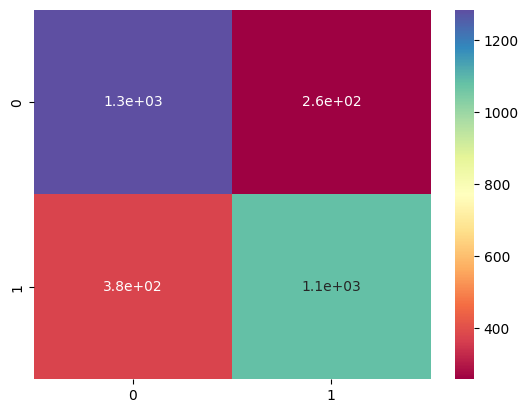

In [ ]:
#confusion matrix and classification report
y_act = y_test.replace({"non-suicide":0,'suicide':1})
y_pred = modelxgb.predict(X_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='Spectral')
print(classification_report(y_act,y_pred))


# K-Nearest Neighbour

In [ ]:
modelknn = RandomizedSearchCV(KNeighborsClassifier(),{'n_neighbors':[8],'metric':['manhattan','minkowski','cosine','tanimoto'],
                                                   'p':[1,2]},random_state=42,n_jobs=-1)
modelknn.fit(X_train, y_train)
print('Training score:',modelknn.score(X_train, y_train))
print('Testing score:',modelknn.score(X_test,y_test))
print(modelknn.best_estimator_)

Training score: 0.8729818545506501
Testing score: 0.8526666666666667
KNeighborsClassifier(metric='cosine', n_neighbors=8, p=1)


              precision    recall  f1-score   support

 non-suicide       0.83      0.90      0.86      1542
     suicide       0.88      0.80      0.84      1458

    accuracy                           0.85      3000
   macro avg       0.86      0.85      0.85      3000
weighted avg       0.86      0.85      0.85      3000



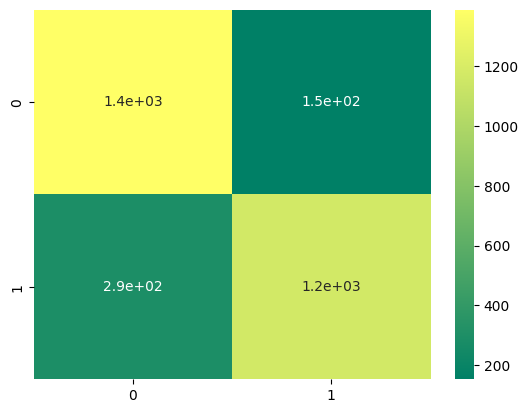

In [ ]:
y_act = y_test
y_pred = modelknn.predict(X_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='summer')
print(classification_report(y_act,y_pred))

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, classification_report

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [ ]:
df['class'] = df['class'].map({'non-suicide': 0, 'suicide': 1})


In [ ]:
#train_classifier(svc,X_train,y_train,X_test,y_test)



# Conclusion

In [ ]:
# save the Model
with open('best_model.pkl', 'wb') as f:
    pickle.dump(VotingClassifiers, f)

In [ ]:
def preprocess(inp):
    inp = inp.lower() #convert to lower case
    inp = inp.replace(r'[^\w\s]+', '') #remove punctuations
    inp = [word for word in inp.split() if word not in (stop_words)] #tokenize the sentence
    inp = ' '.join([ps.stem(i) for i in inp]) #stremming
    inputToModel = vectorizer.transform([inp]).toarray() #transform to vector form
    return inputToModel

In [ ]:
def app(input_text):
    # Define the input text box
    print('Input : ',input_text) #take input from user
    processed_array = preprocess(input_text) #preprocess the text
    predict = VotingClassifiers.predict(processed_array) #Model prediction
    print('Output : ', predict[0])

In [ ]:
app('i am tired of my life i want to end my life')

Input :  i am tired of my life i want to end my life
Output :  suicide


In [ ]:
app('Have a nice day! Happy Coding😊')

Input :  Have a nice day! Happy Coding😊
Output :  non-suicide


In [ ]:
app('i do not want to live')

Input :  i do not want to live
Output :  suicide


In [ ]:
app('i want to live')

Input :  i want to live
Output :  suicide


In [ ]:
app('i want to live happily')

Input :  i want to live happily
Output :  suicide


In [ ]:
app('i failed my exams, i do not feel like living')

Input :  i failed my exams, i do not feel like living
Output :  suicide


In [ ]:
app('I know no one here cares but anyways I was fighting sans in undertale and I was doing very good I had 39 hp and was gonna fully heal before his final attack because I had most of my healing items when I clicked fight I realized I fucked up because the dialogue for his final attack appeared and I got to the very last attack with 9 hp then died fml')

Input :  I know no one here cares but anyways I was fighting sans in undertale and I was doing very good I had 39 hp and was gonna fully heal before his final attack because I had most of my healing items when I clicked fight I realized I fucked up because the dialogue for his final attack appeared and I got to the very last attack with 9 hp then died fml
Output :  non-suicide


In [ ]:
app('my life is meaningless i just want to end my life so badly my life is completely empty and i dont want to have to create meaning in it creating meaning is pain how long will i hold back the urge to run my car head first into the next person coming the opposite way when will i stop feeling jealous of tragic characters like gomer pile for the swift end they were able to bring to their lives')

Input :  my life is meaningless i just want to end my life so badly my life is completely empty and i dont want to have to create meaning in it creating meaning is pain how long will i hold back the urge to run my car head first into the next person coming the opposite way when will i stop feeling jealous of tragic characters like gomer pile for the swift end they were able to bring to their lives
Output :  suicide


In [ ]:
!pip install ipywidgets

In [ ]:
import ipywidgets as widgets
from IPython.display import display
import pickle
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import VotingClassifier

# Load the pre-trained model
with open('best_model.pkl', 'rb') as f:
    VotingClassifiers = pickle.load(f)

# Load the TF-IDF vectorizer
with open('tfidf.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

# Define the stopwords
stop_words = set(stopwords.words('english'))

# Define the Porter Stemmer
ps = PorterStemmer()

# Define the preprocessing function
def preprocess(inp):
    inp = inp.lower()  # convert to lower case
    inp = inp.replace(r'[^\w\s]+', '')  # remove punctuations
    inp = [word for word in inp.split() if word not in (stop_words)]  # tokenize the sentence
    inp = ' '.join([ps.stem(i) for i in inp])  # stemming
    inputToModel = vectorizer.transform([inp]).toarray()  # transform to vector form
    return inputToModel

# Define the interactive widgets
text_input = widgets.Text(description="Enter text:")
button = widgets.Button(description="Predict")
output_label = widgets.Label()

# Define the event handler for button click
def on_button_click(b):
    # Get the input text
    input_text = text_input.value

    # Preprocess the input text
    processed_array = preprocess(input_text)

    # Make a prediction using the trained model
    prediction = VotingClassifiers.predict(processed_array)

    # Display the prediction
    output_label.value = f"Prediction: {prediction[0]}"

# Attach the event handler to the button
button.on_click(on_button_click)

# Display the widgets
display(widgets.VBox([text_input, button, output_label]))